## Driving question

> What is the reality of marijuana citations and arrests in Pittsburgh?

Since the passage of the 2015 City Ordinance decriminalizing marijuana, what are the trends of arrests and citations in the Pittsburgh area? For example, what were the demographic and geographic characteristics of these events?

## Analysis summary

TBD

## Data sources

We downloaded data covering 2016–2023 from these sources, included as CSV files referenced below.

[Pittsburgh Arrest Data](https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f?inner_span=True), [Data Dictionary](https://data.wprdc.org/dataset/arrest-data/resource/e554650d-f48f-49b2-88f3-e19878a1c245?inner_span=True)

[Pittsburgh Police Non-Traffic Citation Data](https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86), [Data Dictionary](https://data.wprdc.org/dataset/non-traffic-citations/resource/ec71e915-cd01-4281-86c0-2d3a06701616)

In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook

In [20]:
# Read the CSV files from the same directory as this notebook
# 'low_memory=False' is used to prevent pandas from guessing data types in chunks, which can cause issues with mixed data types.
arrests_df = pd.read_csv('arrest_data_wprdc.csv', low_memory=False)
citations_df = pd.read_csv('citation_data_wprdc.csv', low_memory=False)

# Further reduce the size of the data frame by keeping only necessary columns

In [21]:
arrests_df

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66477,88273,2064626,23150285,65.0,M,B,2023-09-26T10:30:00,"2800 Block Bedford AV Pittsburgh, PA 15219",3502 Burglary. / 3921(a) Theft by Unlawful Tak...,"1500 Block S Dallas AV Pittsburgh, PA 15217",Point Breeze,4,1406.0,9.0,3.0,-79.912484,40.441636
66478,88274,2064627,23175998,40.0,M,W,2023-11-05T16:19:00,"1400 Block Sheffield ST Pittsburgh, PA 15233",3304 Criminal Mischief. / 3502 Burglary. / 392...,"1400 Block Sheffield ST Pittsburgh, PA 15233",Manchester,1,2107.0,6.0,1.0,-80.026065,40.453105
66479,88275,2064628,23179042,44.0,F,B,2023-11-11T03:41:00,"900 Block Brookline BL Pittsburgh, PA 15226",5104 Resisting Arrest or Other Law Enforcement...,"900 Block Brookline BL Pittsburgh, PA 15226",Brookline,6,1918.0,4.0,5.0,-80.019190,40.392879
66480,88276,2064629,23140205,18.0,M,B,2023-11-04T00:49:00,"6600 Block Frankstown AV Pittsburgh, PA 15206",2702 Aggravated Assault. / 2705 Recklessy Enda...,"N Murtland ST Pittsburgh, PA 15208",Homewood North,3,1302.0,NaN,NaN,NaN,NaN


In [22]:
arrests_df.columns

Index(['_id', 'PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME',
       'ARRESTLOCATION', 'OFFENSES', 'INCIDENTLOCATION',
       'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

In [23]:
permitted_arrests_columns = [
    'RACE',
    'OFFENSES',
    'INCIDENTZONE'
]
arrests_df_2 = arrests_df[permitted_arrests_columns]

In [24]:
# Change the name of 'INCIDENTZONE' to 'ZONE'
arrests_df_3 = arrests_df_2.rename(columns={'INCIDENTZONE': 'ZONE'})
arrests_df_3

,RACE,OFFENSES,ZONE
0,B,3929 Retail Theft.,5
1,W,13(a)(16) Possession of Controlled Substance,OSC
2,B,3929 Retail Theft.,5
3,W,5503 Disorderly Conduct. / 5505 Public Drunken...,1
4,B,2702 Aggravated Assault. / 2705 Recklessy Enda...,5
...,...,...,...
66477,B,3502 Burglary. / 3921(a) Theft by Unlawful Tak...,4
66478,W,3304 Criminal Mischief. / 3502 Burglary. / 392...,1
66479,B,5104 Resisting Arrest or Other Law Enforcement...,6
66480,B,2702 Aggravated Assault. / 2705 Recklessy Enda...,3


In [25]:
citations_df

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1078081,16157849,M,B,29.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,2,1078082,16157849,M,W,21.0,2016-08-22T23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,3,1078083,16159579,NaN,NaN,NaN,2016-08-25T11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,4,1078084,16159780,M,B,22.0,2016-08-25T16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dang...",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,5,1078085,16161591,F,W,22.0,2016-08-28T00:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16290,26807,1105891,23179537,F,B,28.0,2023-11-12T00:54:00,"1700 Block E CARSON ST PITTSBURGH, PA",5505 Public Drunkenness,NaN,3,NaN,3.0,3.0,-79.981872,40.428593
16291,26808,1105892,23179537,F,B,28.0,2023-11-12T00:54:00,"1700 Block E CARSON ST PITTSBURGH, PA",601.12 Interference with Official Duties,NaN,3,NaN,3.0,3.0,-79.981872,40.428593
16292,26809,1105893,23179983,F,W,23.0,2023-11-12T23:31:00,"E CARSON ST & S 13TH ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.985330,40.428783
16293,26810,1105894,23180037,F,B,24.0,2023-11-13T02:08:00,"S 17TH ST & E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.982051,40.428843


In [26]:
citations_df.columns

Index(['_id', 'PK', 'CCR', 'GENDER', 'RACE', 'AGE', 'CITEDTIME',
       'INCIDENTLOCATION', 'OFFENSES', 'NEIGHBORHOOD', 'ZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

In [27]:
permitted_citations_columns = [
    'RACE',
    'OFFENSES',
    'ZONE'
]
citations_df_2 = citations_df[permitted_citations_columns]
citations_df_2

,RACE,OFFENSES,ZONE
0,B,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,4
1,W,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,4
2,NaN,5505 Public Drunkenness,1
3,B,"6501(a)(1) Scattering Rubbish; Any waste, dang...",5
4,W,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE N...,2
...,...,...,...
16290,B,5505 Public Drunkenness,3
16291,B,601.12 Interference with Official Duties,3
16292,W,601.08 (a) Open Container Law,3
16293,B,601.08 (a) Open Container Law,3


# Combine arrests and citations into one data frame, retaining the record type as its own column

In [31]:
#Give each row a value of "arrest" or "citation" in the "record_type" column
arrests_df_3.loc[:, 'record_type'] = 'arrest'
citations_df_2.loc[:, 'record_type'] = 'citation'

In [32]:
# Combine the two data frames
combined_df = pd.concat([arrests_df_3, citations_df_2])
combined_df

,RACE,OFFENSES,ZONE,record_type
0,B,3929 Retail Theft.,5,arrest
1,W,13(a)(16) Possession of Controlled Substance,OSC,arrest
2,B,3929 Retail Theft.,5,arrest
3,W,5503 Disorderly Conduct. / 5505 Public Drunken...,1,arrest
4,B,2702 Aggravated Assault. / 2705 Recklessy Enda...,5,arrest
...,...,...,...,...
16290,B,5505 Public Drunkenness,3,citation
16291,B,601.12 Interference with Official Duties,3,citation
16292,W,601.08 (a) Open Container Law,3,citation
16293,B,601.08 (a) Open Container Law,3,citation


# Strip out non-marijuana rows from the combined data frame

This one gets complicated, because we have to determine what counts as non-marijuana.
We'll start by looking for anything which explicitly mentions "marijuana" in the OFFENSES column.

In [44]:
mj_only_df = combined_df[combined_df['OFFENSES'].str.lower().str.contains('marijuana', na=False)]
mj_only_df

,RACE,OFFENSES,ZONE,record_type
16,W,5505 Public Drunkenness / 13(a)(32) Parapherna...,1,arrest
33,W,4303 General Lighting Requirements. / 13(a)(31...,2,arrest
57,B,4910 Tampering with or Fabricating Physical Ev...,5,arrest
73,B,1543 Driving While Operating Privilege is Susp...,1,arrest
83,B,13(a)(16) Possession of Controlled Substance /...,OSC,arrest
...,...,...,...,...
16259,B,627.02(b)(i) Possessing a small amount of mari...,3,citation
16270,B,627.02(b)(i) Possessing a small amount of mari...,3,citation
16280,B,627.02(b)(i) Possessing a small amount of mari...,3,citation
16281,B,627.02(b)(i) Possessing a small amount of mari...,3,citation


# Add a column labeling rows which only involve marijuana arrests, or have other arrest causes

In this case, the presence of a '/' indicates the presence of multiple offenses, so we'll use that.

In [52]:
mj_only_df.loc[:, 'multiple_offenses'] = mj_only_df['OFFENSES'].str.contains('/')
# There are no cases where a citation lists multiple offenses, so automatically set the 'multiple_offenses' column to False where record_type is 'citation', to avoid confusion.
mj_only_df.loc[mj_only_df['record_type'] == 'citation', 'multiple_offenses'] = False
mj_only_df

,RACE,OFFENSES,ZONE,record_type,multiple_offenses
16,W,5505 Public Drunkenness / 13(a)(32) Parapherna...,1,arrest,True
33,W,4303 General Lighting Requirements. / 13(a)(31...,2,arrest,True
57,B,4910 Tampering with or Fabricating Physical Ev...,5,arrest,True
73,B,1543 Driving While Operating Privilege is Susp...,1,arrest,True
83,B,13(a)(16) Possession of Controlled Substance /...,OSC,arrest,True
...,...,...,...,...,...
16259,B,627.02(b)(i) Possessing a small amount of mari...,3,citation,False
16270,B,627.02(b)(i) Possessing a small amount of mari...,3,citation,False
16280,B,627.02(b)(i) Possessing a small amount of mari...,3,citation,False
16281,B,627.02(b)(i) Possessing a small amount of mari...,3,citation,False


In [53]:
multiple_offenses_df = mj_only_df[mj_only_df['multiple_offenses'] == True]
multiple_offenses_df = multiple_offenses_df.drop('multiple_offenses', axis=1)
multiple_offenses_df

,RACE,OFFENSES,ZONE,record_type
16,W,5505 Public Drunkenness / 13(a)(32) Parapherna...,1,arrest
33,W,4303 General Lighting Requirements. / 13(a)(31...,2,arrest
57,B,4910 Tampering with or Fabricating Physical Ev...,5,arrest
73,B,1543 Driving While Operating Privilege is Susp...,1,arrest
83,B,13(a)(16) Possession of Controlled Substance /...,OSC,arrest
...,...,...,...,...
66413,W,13(a)(32) Paraphernalia - Use or Possession / ...,2,arrest
66442,B,9501 Bench Warrant / 13(a)(31) Marijuana: Poss...,3,arrest
66459,B,5104 Resisting Arrest or Other Law Enforcement...,5,arrest
66460,B,5104 Resisting Arrest or Other Law Enforcement...,5,arrest


In [54]:
single_offense_df = mj_only_df[mj_only_df['multiple_offenses'] == False]
single_offense_df = single_offense_df.drop('multiple_offenses', axis=1)
single_offense_df

,RACE,OFFENSES,ZONE,record_type
101,B,13(a)(31) Marijuana: Possession Small Amount,5,arrest
102,B,13(a)(31) Marijuana: Possession Small Amount,5,arrest
136,W,13(a)(31) Marijuana: Possession Small Amount,1,arrest
156,W,13(a)(31) Marijuana: Possession Small Amount,1,arrest
214,B,13(a)(31) Marijuana: Possession Small Amount,5,arrest
...,...,...,...,...
16259,B,627.02(b)(i) Possessing a small amount of mari...,3,citation
16270,B,627.02(b)(i) Possessing a small amount of mari...,3,citation
16280,B,627.02(b)(i) Possessing a small amount of mari...,3,citation
16281,B,627.02(b)(i) Possessing a small amount of mari...,3,citation


In [ ]:
# Count the number of offenses by record type and zone
single_offense_count_by_zone = single_offense_df.groupby(['ZONE', 'record_type']).size().unstack()
single_offense_count_by_zone

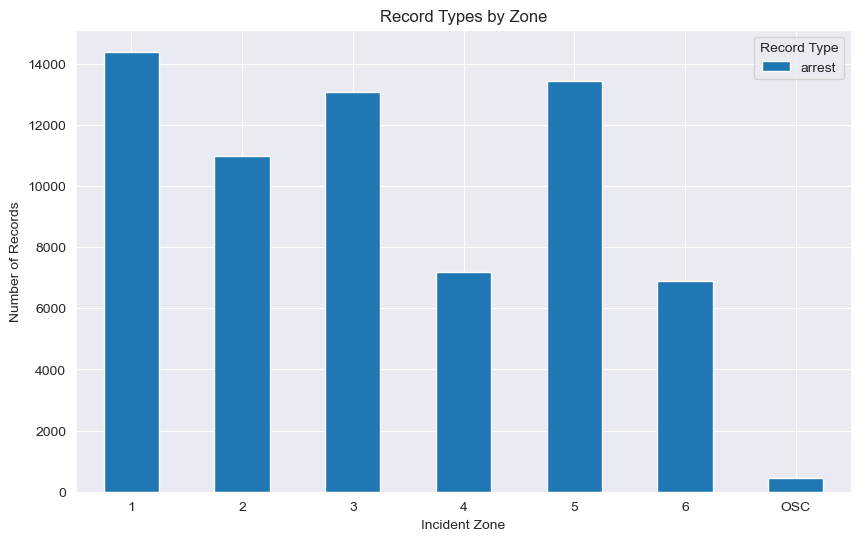

In [30]:
# Example chart to be deleted

# Grouping the data by INCIDENTZONE and record_type and counting occurrences
zone_record_counts = mj_data_df.groupby(['INCIDENTZONE', 'record_type']).size().unstack()

# Plotting the bar chart
zone_record_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Record Types by Zone')
plt.xlabel('Incident Zone')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)  # Keeping x-axis labels horizontal
plt.legend(title='Record Type')
plt.show()